In [1]:
from matplotlib import pyplot as plt
import torch

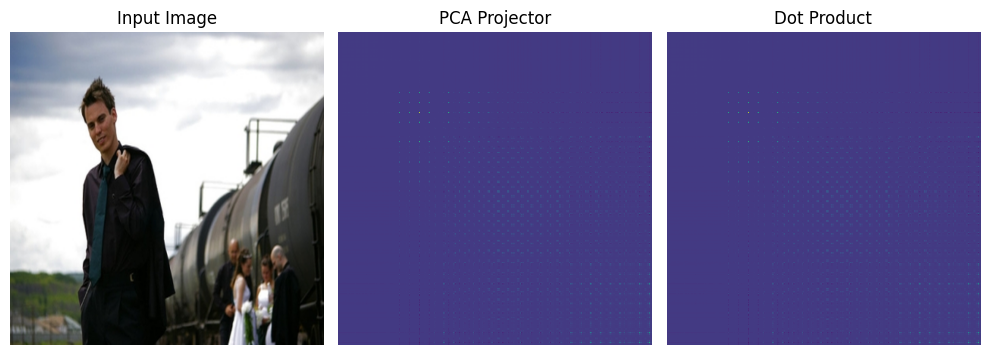

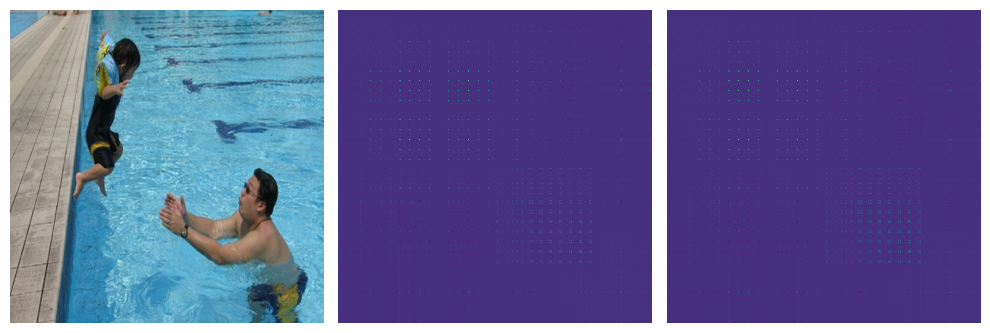

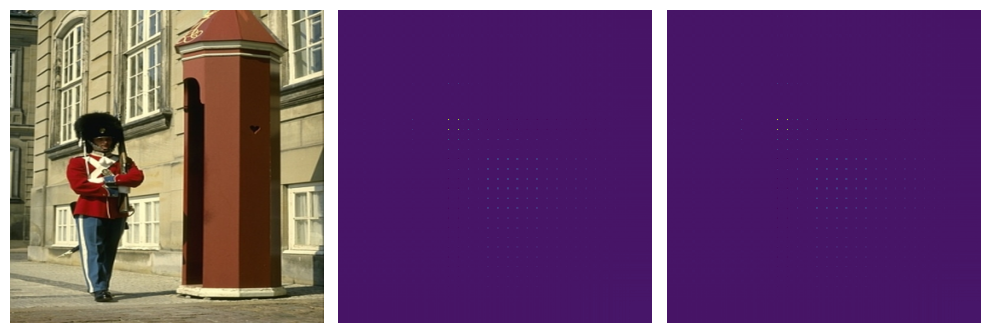

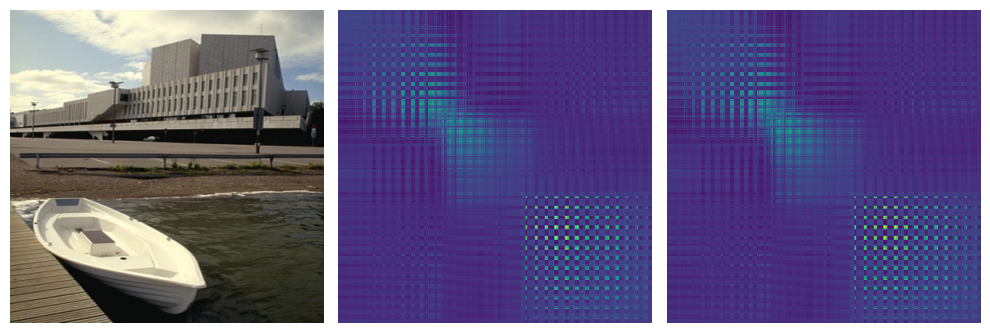

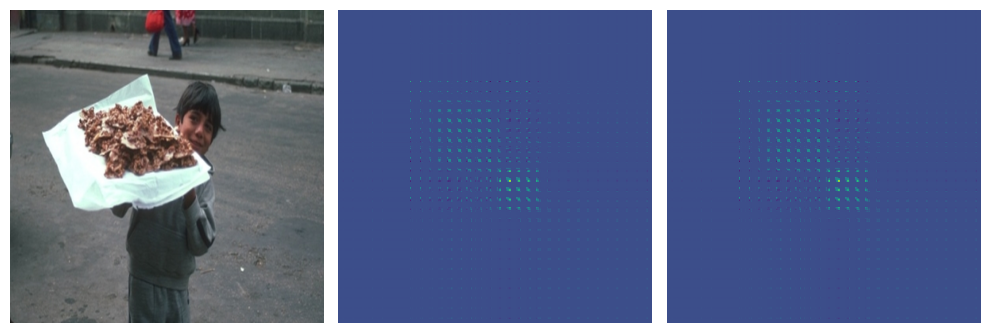

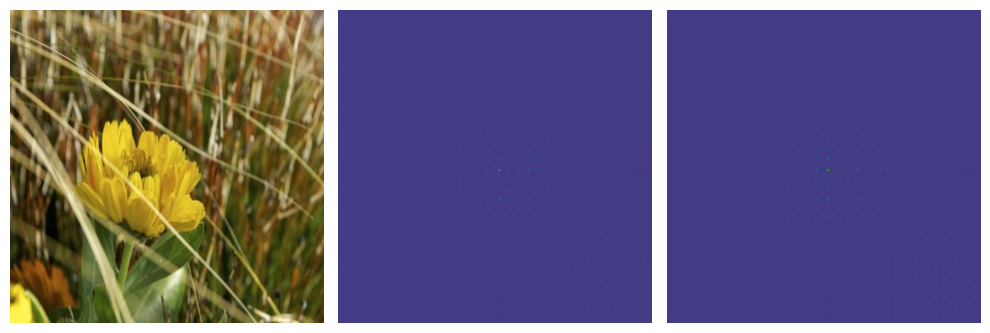

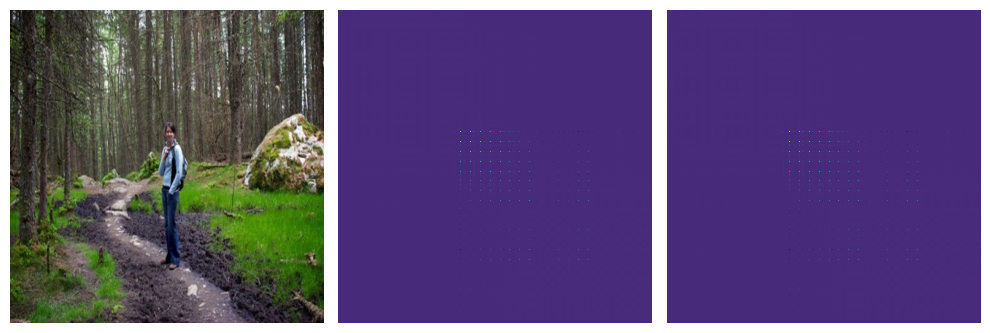

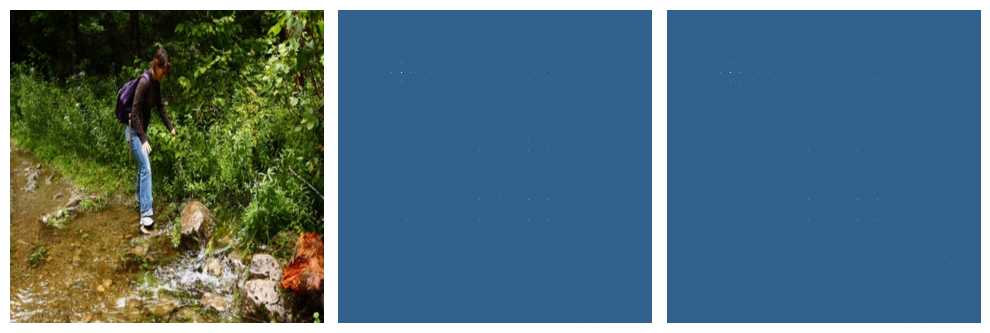

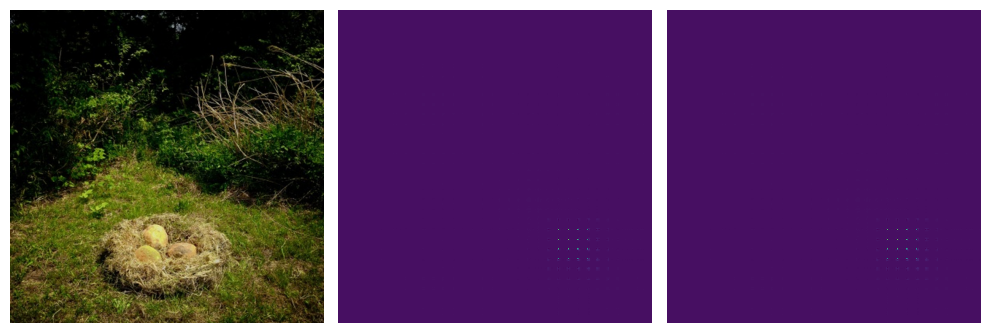

In [3]:
import matplotlib.image as mpimg
# Path for Eigen Vectors
image_path = '/home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/object-segmentation/ECSSD/images/'
fa_path='/home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/object-segmentation/ECSSD/Affinity/'
method1 = "/home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/object-segmentation/ECSSD/eigs_dot1PCA64linearpredlinear_dssubmax_pred2/"
method2 = "/home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/object-segmentation/ECSSD/eigs/"

file='0079_resized'

# Number of eigenvectors to compute plus 1 (zeroth eigenvector will be noise)
K = 5
h=32
w=32
titles = ['PCA Projector', 'Dot Product', 'Eigen Vector 3','Eigen Vector 4']
filenames=["0076_resized",  "0088_resized",  "0109_resized",  "0122_resized","0125_resized",  "0296_resized",  "0309_resized", "0488_resized", "0511_resized"]
# filenames=["0022_resized",  "0181_resized",  "0461_resized",  "0574_resized","0076_resized",  "0277_resized",  "0478_resized",  "0602_resized", "0079_resized",  "0309_resized", "0511_resized" , "0766_resized", "0086_resized",  "0376_resized",  "0557_resized",  "0780_resized", "0095_resized",  "0403_resized",  "0566_resized",  "0800_resized"]

for idx,file in enumerate(filenames):
    plt.figure(figsize=(10, 8))
    image_ip=mpimg.imread(image_path+file+'.png')

    data1 = torch.load(method1+file+'.pth')
    eigen_values1 = data1['eigenvalues']
    eigen_vectors1 = data1['eigenvectors'].T
    # print(eigen_vectors1.shape)
    # Path for Eigen Vectors

    data2 = torch.load(method2+file+'.pth')
    eigen_values2 = data2['eigenvalues']
    eigen_vectors2 = data2['eigenvectors'].T
    # print(eigen_vectors2.shape)

    w_feat1=torch.matmul(eigen_vectors1,eigen_vectors1.T)
    torch.save(w_feat1,fa_path+'DSSem'+file+'.pth')
    w_feat2=torch.matmul(eigen_vectors2, eigen_vectors2.T)
    torch.save(w_feat1,fa_path+'DS'+file+'.pth')
    plt.subplot(1,3,1)
    plt.imshow(image_ip)
    if idx==0:
        plt.title('Input Image')
    plt.axis('off')
    for j, (title,eigenvectors) in enumerate([("PCA Projector",eigen_vectors1),
                                      ("Dot Product", eigen_vectors2)
                                      ]):
        plt.subplot(1, 3, j+2)
        # image = eigenvectors[:,1].reshape(h, w)
       # Image.fromarray(image).convert('L').save("/home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/object-segmentation/ECSSD/vis_eign")
        # Make image positive because it looks nicer
        plt.imshow(w_feat1,)
        plt.imshow(w_feat2, cmap=plt.cm.viridis, interpolation='nearest')
        if idx==0:
            plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()